## Objective of the Project
The objective of this project is to develop a comprehensive Anomaly Detection and Event Prediction system for sensor networks. This system aims to enhance monitoring capabilities by detecting anomalies and predicting events in real-time, enabling proactive responses to potential issues. By leveraging advanced algorithms to analyze sensor data, the system will generate actionable insights that optimize resource allocation and operational efficiency, ultimately revolutionizing sensor network technology and providing our client with a competitive edge in the market.

## Challenges
Developing an Anomaly Detection and Event Prediction system for sensor networks presents several challenges. Firstly, the high volume and variety of sensor data require robust preprocessing techniques to handle noise, missing values, and outliers. Secondly, designing algorithms that can accurately detect anomalies and predict events in real-time necessitates balancing sensitivity and specificity to minimize false positives and negatives. Furthermore, integrating the system into existing infrastructure while ensuring scalability and low latency is crucial for real-time applications. Lastly, maintaining data security and privacy, particularly in compliance with industry standards, is essential to protect sensitive information and build trust with stakeholders.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## Data Preprocessing

In [2]:
# Load the CSV file
df = pd.read_csv("data.csv")

In [3]:
# Display the first few rows and basic information about the dataset
df.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Area                    182 non-null    int64
 1   Sensing Range           182 non-null    int64
 2   Transmission Range      182 non-null    int64
 3   Number of Sensor nodes  182 non-null    int64
 4   Number of Barriers      182 non-null    int64
dtypes: int64(5)
memory usage: 7.2 KB


In [5]:
df.describe()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,182.000000,182.00000,182.000000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000,94.071429
std,15197.252769,7.52069,15.041379,90.248276,65.171006
min,5000.000000,15.00000,30.000000,100.000000,12.000000
25%,9375.000000,21.00000,42.000000,172.000000,42.000000
50%,21875.000000,27.50000,55.000000,250.000000,80.000000
75%,39375.000000,34.00000,68.000000,328.000000,128.750000
max,50000.000000,40.00000,80.000000,400.000000,320.000000


In [6]:
print("\
Unique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

Unique values in each column:
Area: 7 unique values
Sensing Range: 26 unique values
Transmission Range: 26 unique values
Number of Sensor nodes: 26 unique values
Number of Barriers: 122 unique values


## Data Cleaning

In [7]:
# Check for duplicate values
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Area                      0
Sensing Range             0
Transmission Range        0
Number of Sensor nodes    0
Number of Barriers        0
dtype: int64

## Graphical Representation

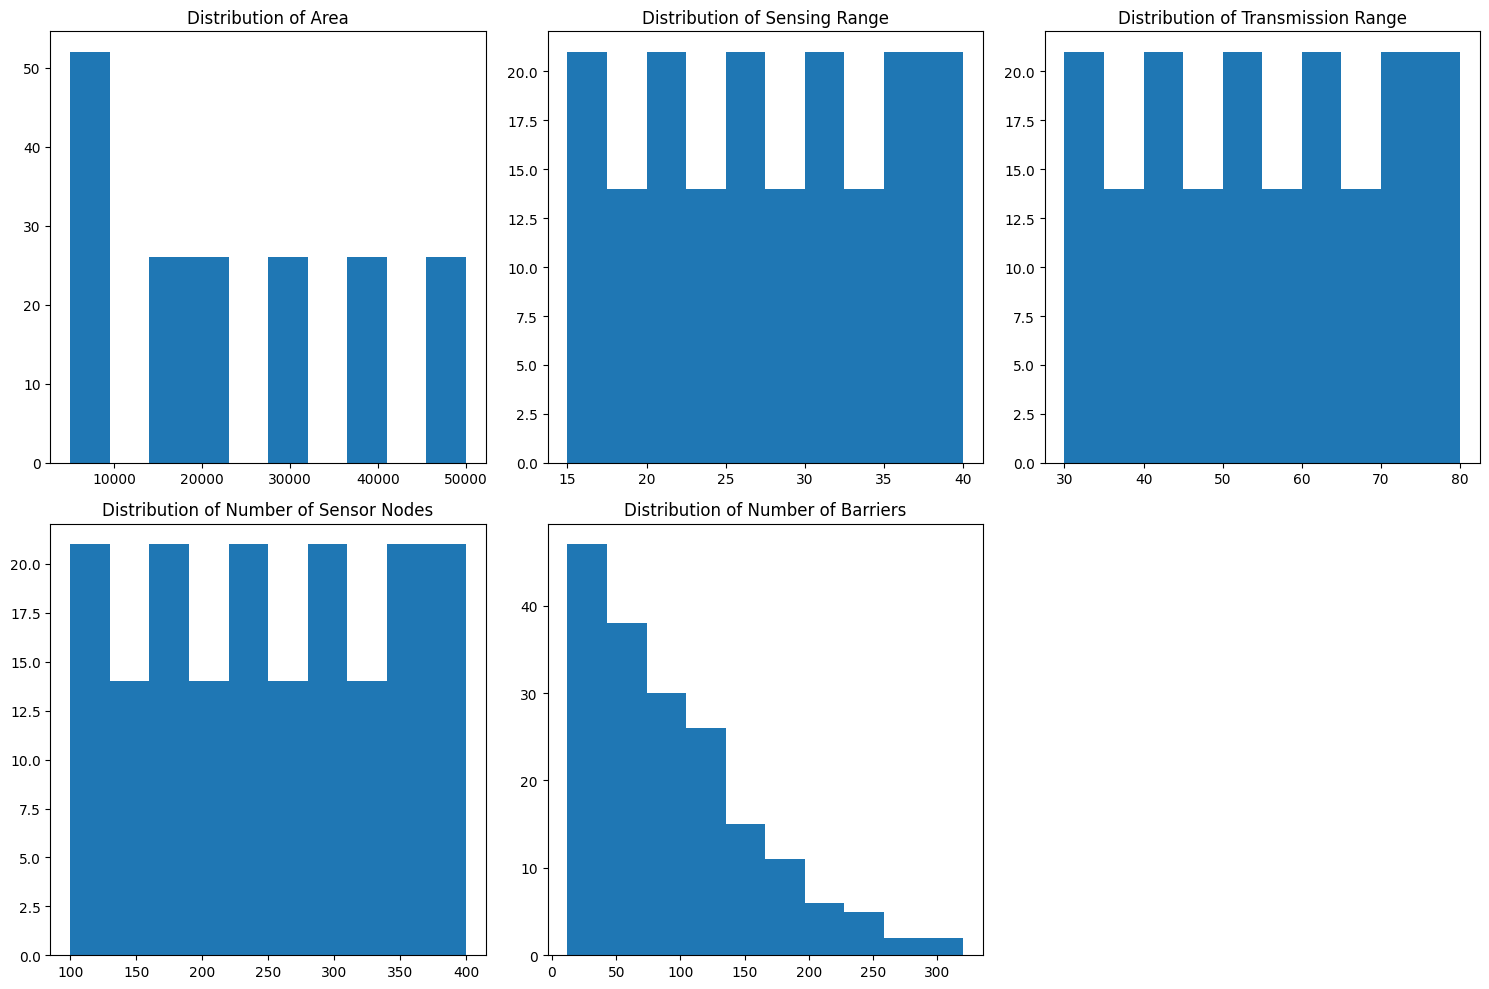

In [9]:
# Create histograms for the specified columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['Area'])
plt.title('Distribution of Area')

plt.subplot(2, 3, 2)
plt.hist(df['Sensing Range'])
plt.title('Distribution of Sensing Range')

plt.subplot(2, 3, 3)
plt.hist(df['Transmission Range'])
plt.title('Distribution of Transmission Range')

plt.subplot(2, 3, 4)
plt.hist(df['Number of Sensor nodes'])
plt.title('Distribution of Number of Sensor Nodes')

plt.subplot(2, 3, 5)
plt.hist(df['Number of Barriers'])
plt.title('Distribution of Number of Barriers')

plt.tight_layout()
plt.show()


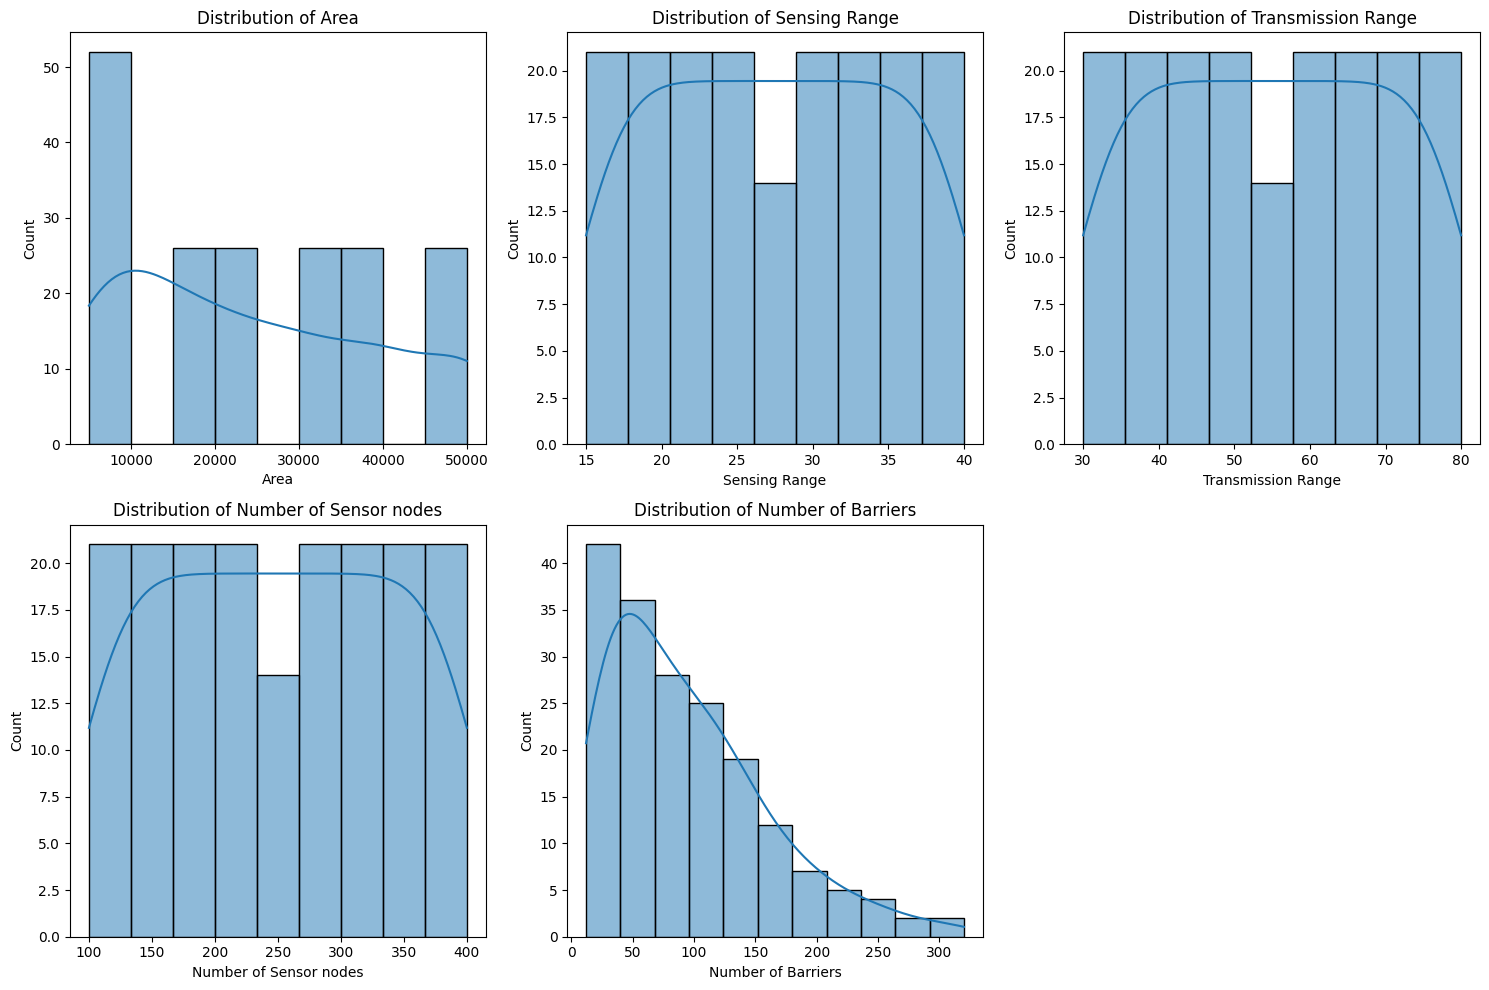

In [13]:
# Create distribution plots for all columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns):
  plt.subplot(2, 3, i + 1)
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

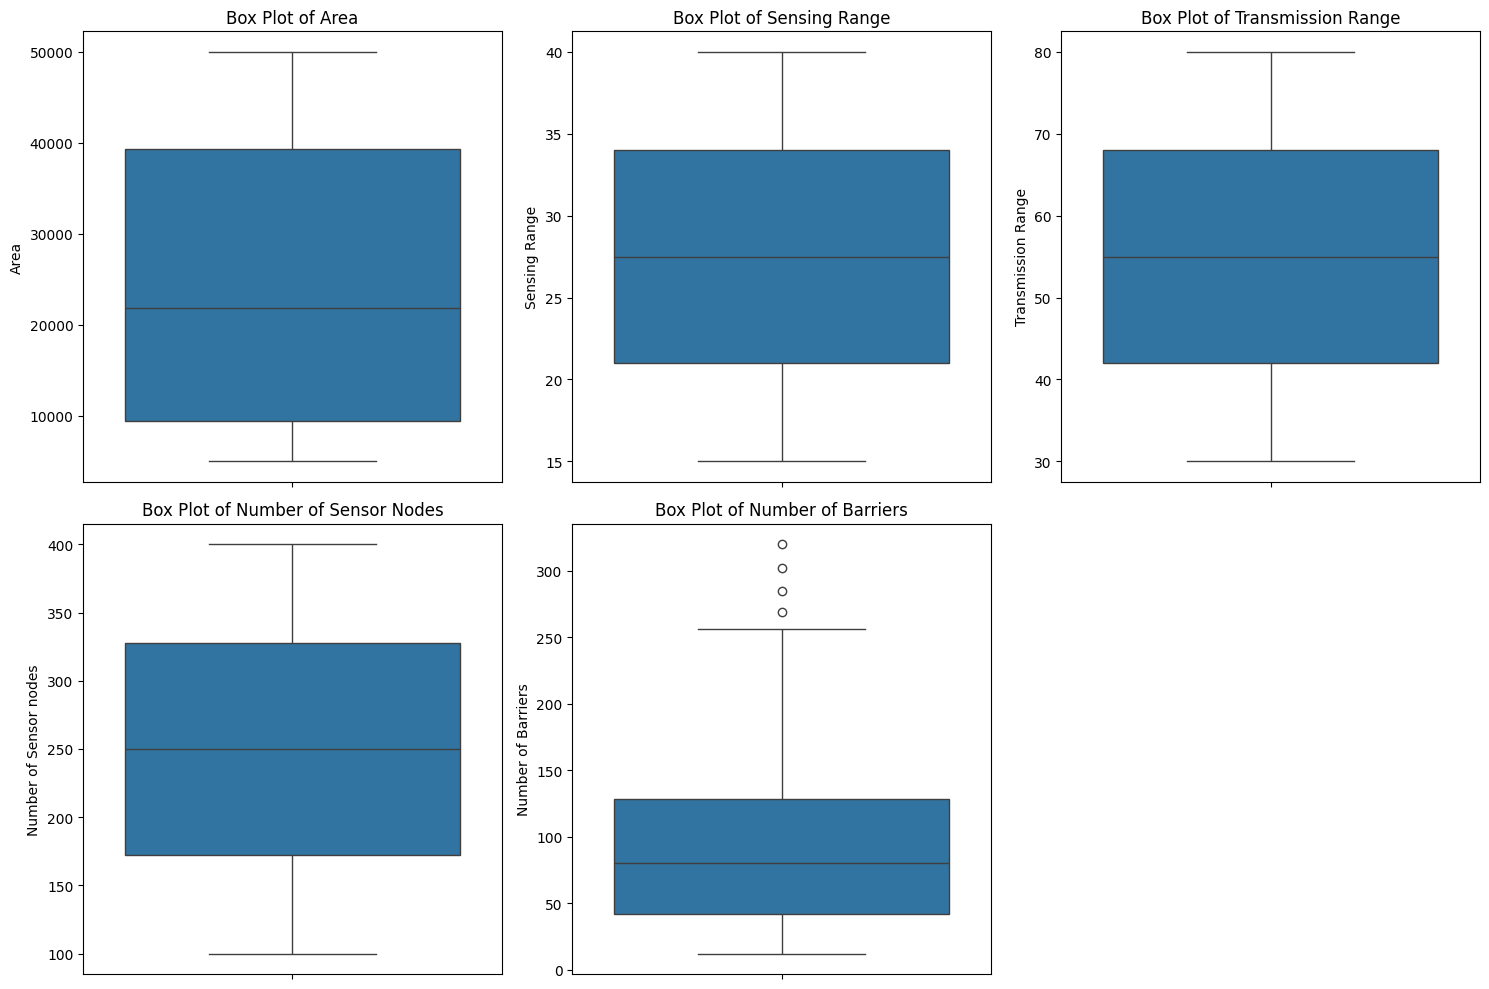

In [10]:
# Create box plots for the specified columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['Area'])
plt.title('Box Plot of Area')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['Sensing Range'])
plt.title('Box Plot of Sensing Range')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['Transmission Range'])
plt.title('Box Plot of Transmission Range')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['Number of Sensor nodes'])
plt.title('Box Plot of Number of Sensor Nodes')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['Number of Barriers'])
plt.title('Box Plot of Number of Barriers')

plt.tight_layout()
plt.show()

Area                     -0.423438
Sensing Range             0.838365
Transmission Range        0.838365
Number of Sensor nodes    0.838365
Number of Barriers        1.000000
Name: Number of Barriers, dtype: float64


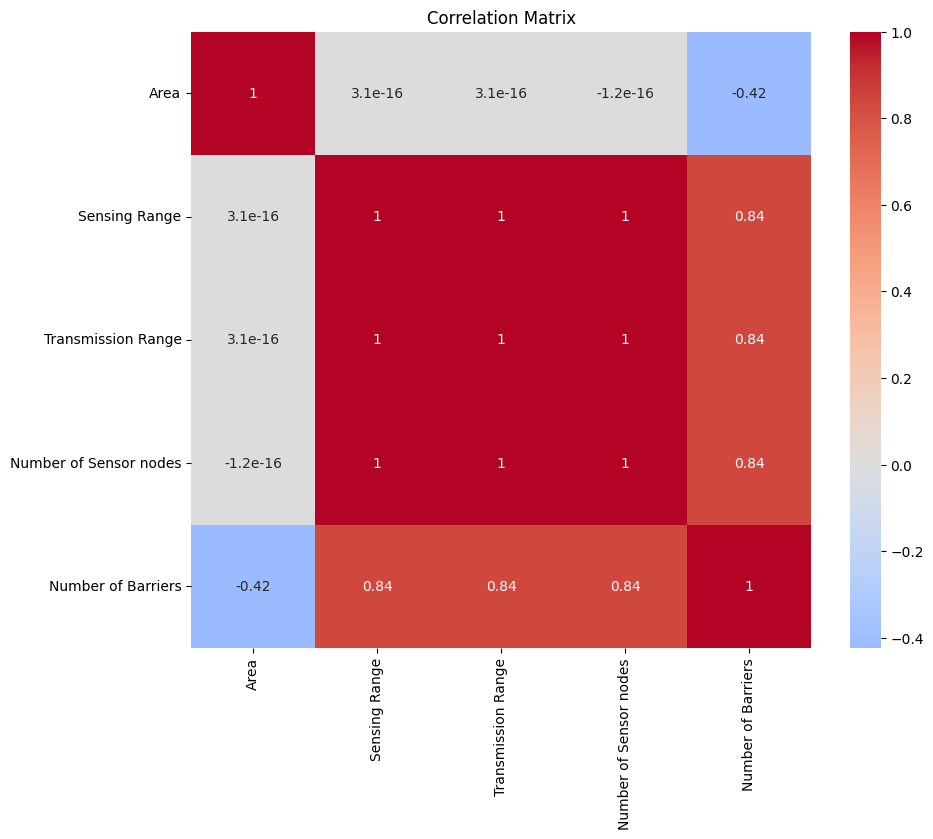

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values for 'Number of Barriers' with other features
correlation_with_barriers = correlation_matrix['Number of Barriers']

# Print the correlation values
print(correlation_with_barriers)

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

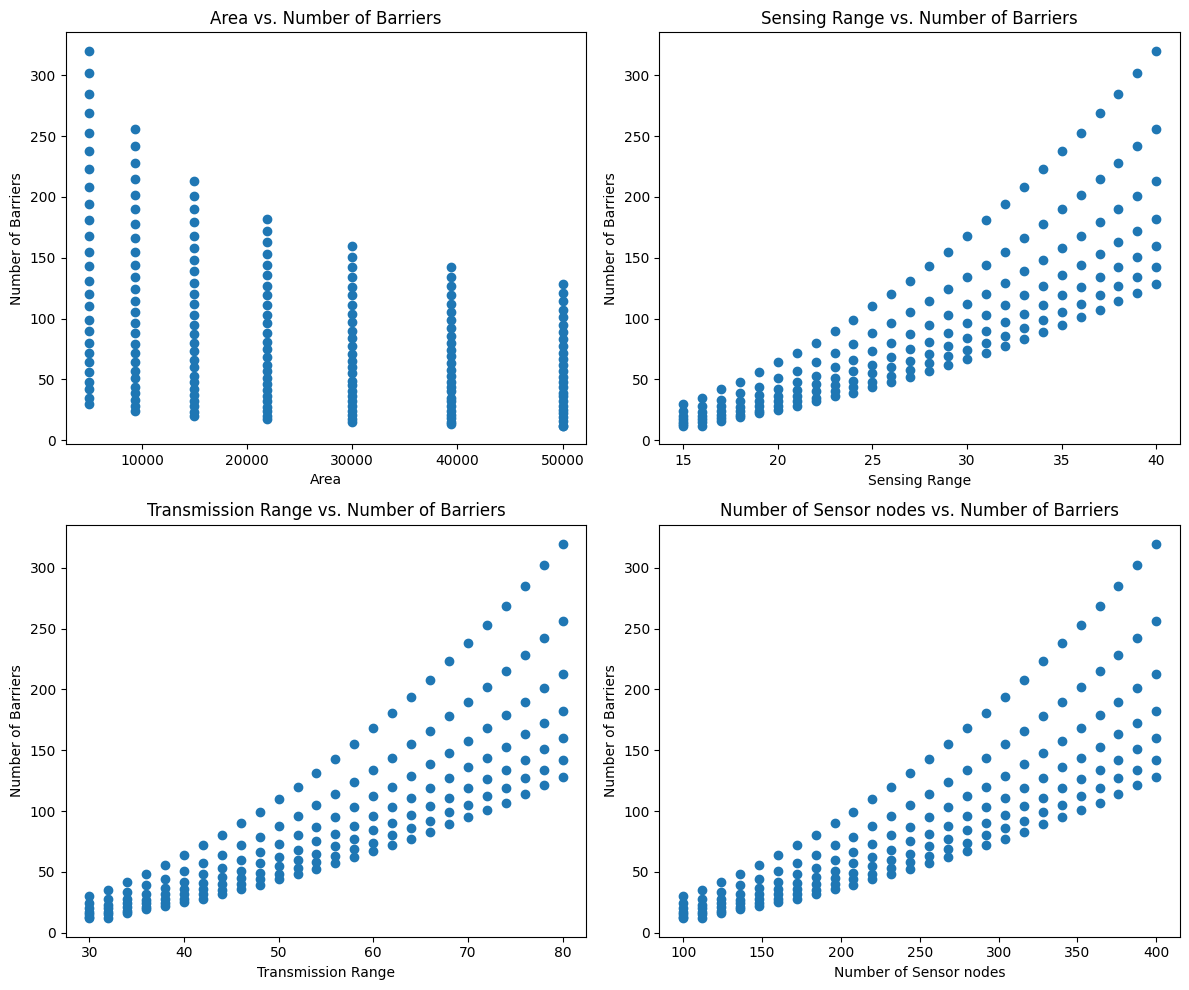

In [12]:
# Create scatter plots for each feature against 'Number of Barriers'
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(df['Area'], df['Number of Barriers'])
axes[0, 0].set_xlabel('Area')
axes[0, 0].set_ylabel('Number of Barriers')
axes[0, 0].set_title('Area vs. Number of Barriers')

axes[0, 1].scatter(df['Sensing Range'], df['Number of Barriers'])
axes[0, 1].set_xlabel('Sensing Range')
axes[0, 1].set_ylabel('Number of Barriers')
axes[0, 1].set_title('Sensing Range vs. Number of Barriers')

axes[1, 0].scatter(df['Transmission Range'], df['Number of Barriers'])
axes[1, 0].set_xlabel('Transmission Range')
axes[1, 0].set_ylabel('Number of Barriers')
axes[1, 0].set_title('Transmission Range vs. Number of Barriers')

axes[1, 1].scatter(df['Number of Sensor nodes'], df['Number of Barriers'])
axes[1, 1].set_xlabel('Number of Sensor nodes')
axes[1, 1].set_ylabel('Number of Barriers')
axes[1, 1].set_title('Number of Sensor nodes vs. Number of Barriers')

plt.tight_layout()
plt.show()

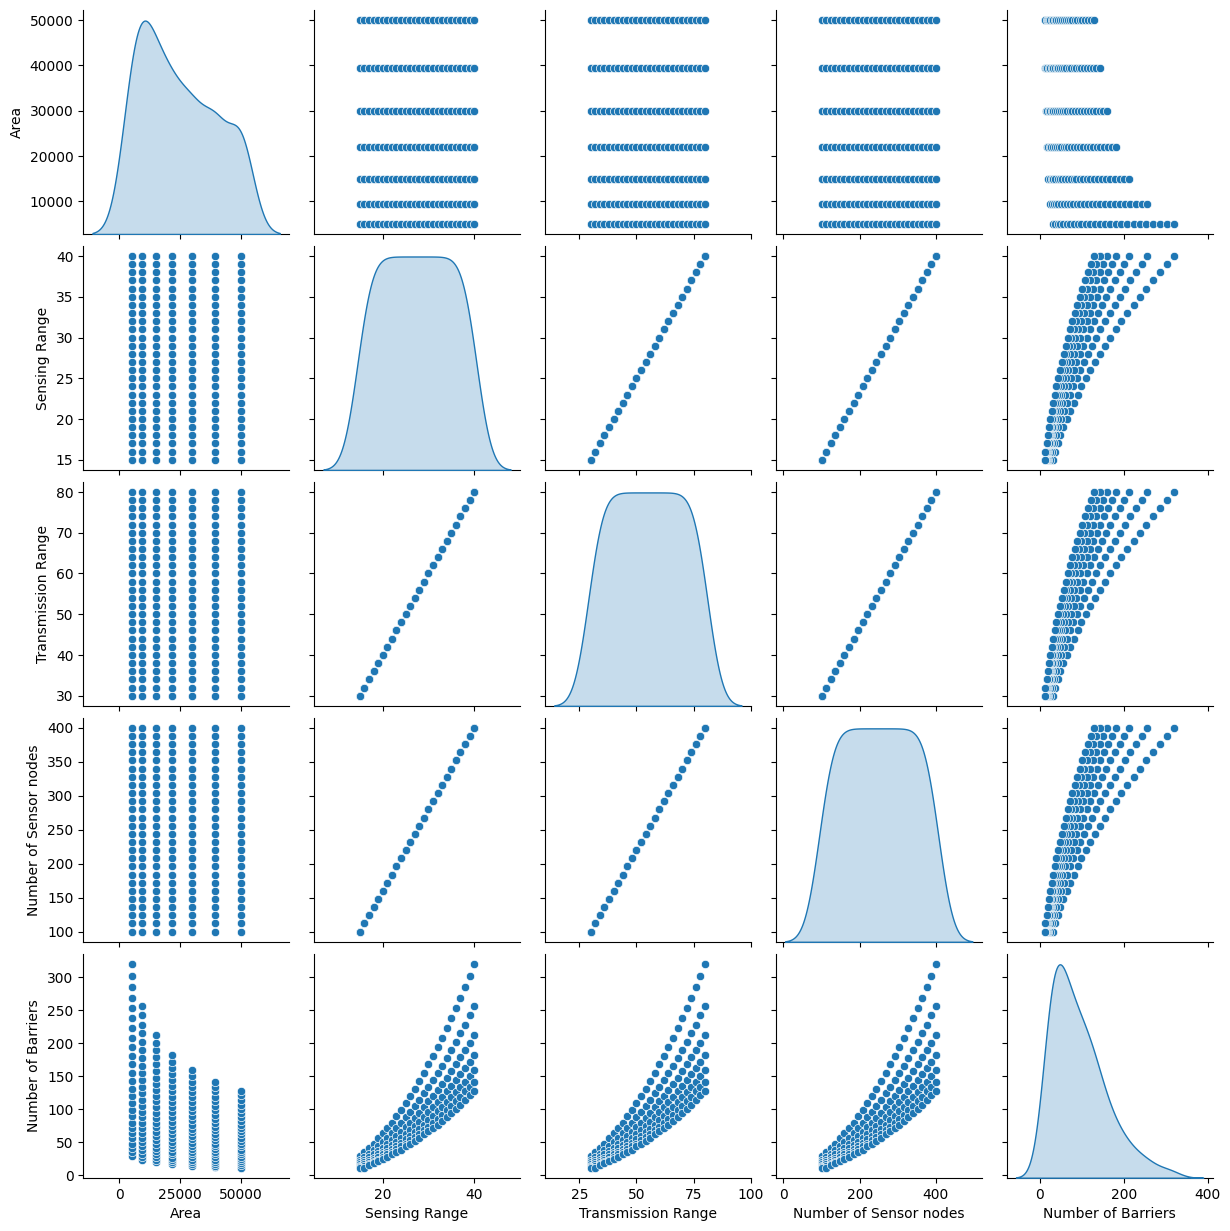

In [38]:
# Pair plots to explore relationships between multiple features
sns.pairplot(df, diag_kind='kde')
plt.show()


In [14]:
from scipy.stats import zscore

# Calculate the Z-scores for each column
z_scores = df.apply(zscore)

# Set a threshold for anomaly detection
threshold = 3

# Identify anomalies
anomalies = (z_scores > threshold) | (z_scores < -threshold)

# Display the rows with anomalies
anomalous_data = df[anomalies.any(axis=1)]
anomalous_data

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
24,5000,39,78,388,302
25,5000,40,80,400,320


In [15]:
from scipy.stats import zscore

# Calculate the Z-scores for each column
z_scores = df.apply(zscore)

print(z_scores)
# Set a threshold for anomaly detection
threshold = 2

# Identify anomalies
anomalies = (z_scores > threshold) | (z_scores < -threshold)

# Display the rows with anomalies
anomalous_data = df[anomalies.any(axis=1)]
anomalous_data


         Area  Sensing Range  Transmission Range  Number of Sensor nodes  \
0   -1.278418      -1.666667           -1.666667               -1.666667   
1   -1.278418      -1.533333           -1.533333               -1.533333   
2   -1.278418      -1.400000           -1.400000               -1.400000   
3   -1.278418      -1.266667           -1.266667               -1.266667   
4   -1.278418      -1.133333           -1.133333               -1.133333   
..        ...            ...                 ...                     ...   
177  1.690812       1.133333            1.133333                1.133333   
178  1.690812       1.266667            1.266667                1.266667   
179  1.690812       1.400000            1.400000                1.400000   
180  1.690812       1.533333            1.533333                1.533333   
181  1.690812       1.666667            1.666667                1.666667   

     Number of Barriers  
0             -0.985840  
1             -0.908907  
2        

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
20,5000,35,70,340,238
21,5000,36,72,352,253
22,5000,37,74,364,269
23,5000,38,76,376,285
24,5000,39,78,388,302
25,5000,40,80,400,320
49,9375,38,76,376,228
50,9375,39,78,388,242
51,9375,40,80,400,256


In [16]:
features = df[['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes']]
target = df['Number of Barriers']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)


In [18]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(contamination=0.05)
predictions = IF.fit_predict(features)
anomalies = df[predictions == -1]

print(anomalies)

highest_value = anomalies['Number of Barriers'].max()
lowest_value = anomalies['Number of Barriers'].min()
print("*******************************")
print("higest anomaly value",highest_value)
print("lowest anomaly value",lowest_value)

      Area  Sensing Range  Transmission Range  Number of Sensor nodes  \
0     5000             15                  30                     100   
25    5000             40                  80                     400   
104  30000             15                  30                     100   
129  30000             40                  80                     400   
130  39375             15                  30                     100   
155  39375             40                  80                     400   
156  50000             15                  30                     100   
157  50000             16                  32                     112   
180  50000             39                  78                     388   
181  50000             40                  80                     400   

     Number of Barriers  
0                    30  
25                  320  
104                  15  
129                 160  
130                  13  
155                 142  
156           

In [19]:
from sklearn.neighbors import LocalOutlierFactor

# Assuming 'features' and 'target' are already defined as in the preceding code

# Create LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Adjust parameters as needed

# Fit the model and get predictions
predictions = lof.fit_predict(features)

# Identify anomalies (predictions == -1 indicate anomalies)
anomalies = df[predictions == -1]

print(anomalies)

# Optionally, get outlier scores
outlier_scores = lof.negative_outlier_factor_

      Area  Sensing Range  Transmission Range  Number of Sensor nodes  \
0     5000             15                  30                     100   
25    5000             40                  80                     400   
130  39375             15                  30                     100   
155  39375             40                  80                     400   
156  50000             15                  30                     100   
157  50000             16                  32                     112   
158  50000             17                  34                     124   
179  50000             38                  76                     376   
180  50000             39                  78                     388   
181  50000             40                  80                     400   

     Number of Barriers  
0                    30  
25                  320  
130                  13  
155                 142  
156                  12  
157                  12  
158           

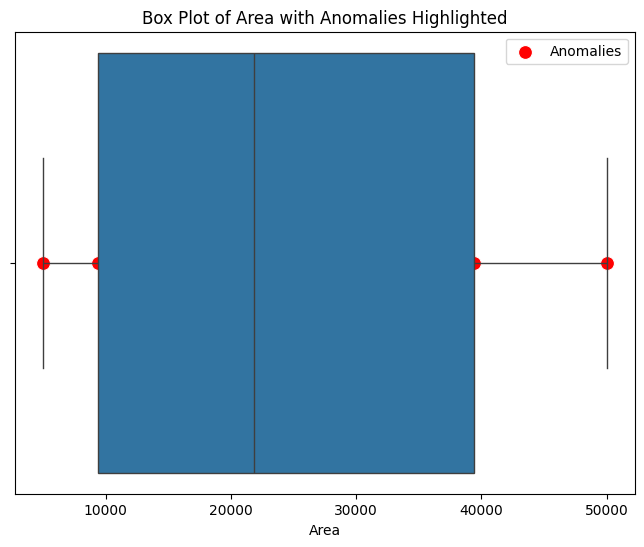

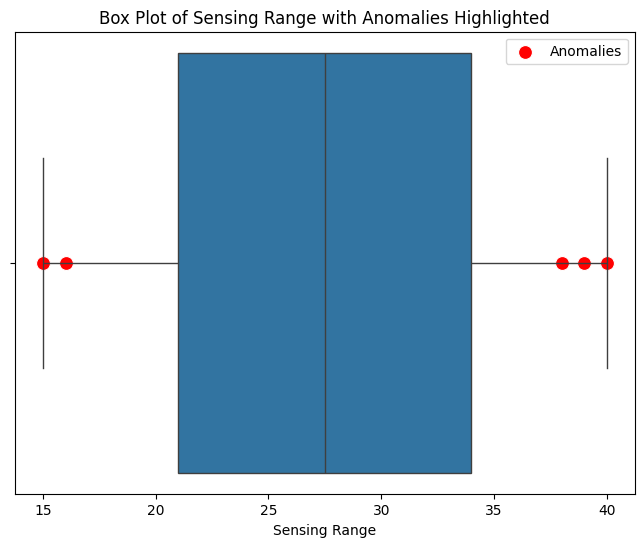

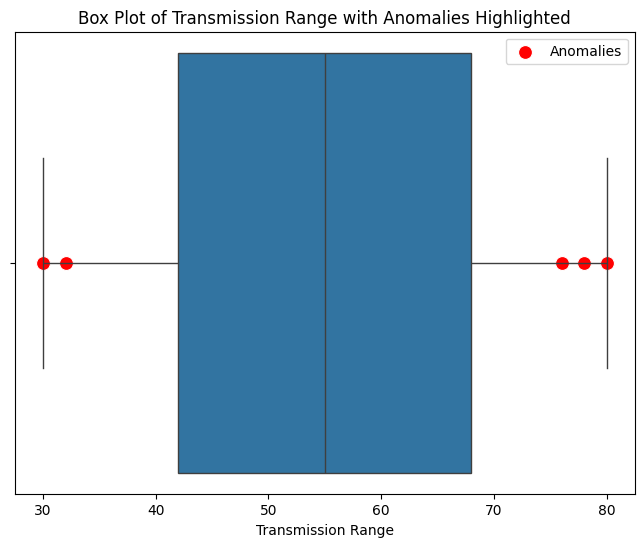

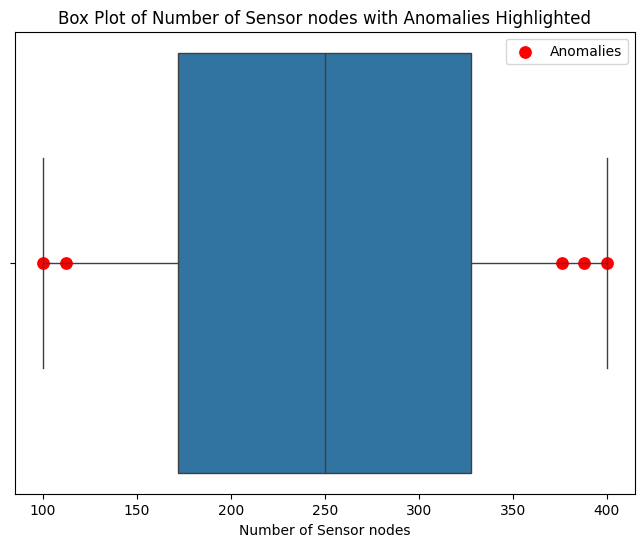

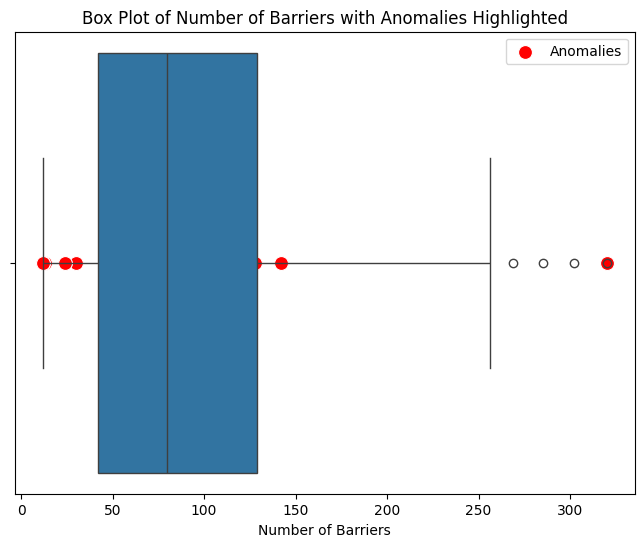

In [43]:
# Assuming 'df' is your DataFrame and you have identified anomalies (e.g., using Isolation Forest or LOF)

# Example: Let's say 'anomalies' is a DataFrame containing the anomalous rows
anomalies = df[IF.fit_predict(features) == -1]  # Replace with your anomaly detection method

# Iterate through columns and create box plots with anomaly highlighting
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])

  # Overlay scatter plot for anomalies (if any)
  if not anomalies.empty:
    sns.scatterplot(x=anomalies[column], y=[0]*len(anomalies), color='red', label='Anomalies', s=100)

  plt.title(f'Box Plot of {column} with Anomalies Highlighted')
  plt.show()


Number of anomalies detected by Isolation Forest: 10
Number of anomalies detected by LOF: 10
Both methods detected the same number of anomalies.


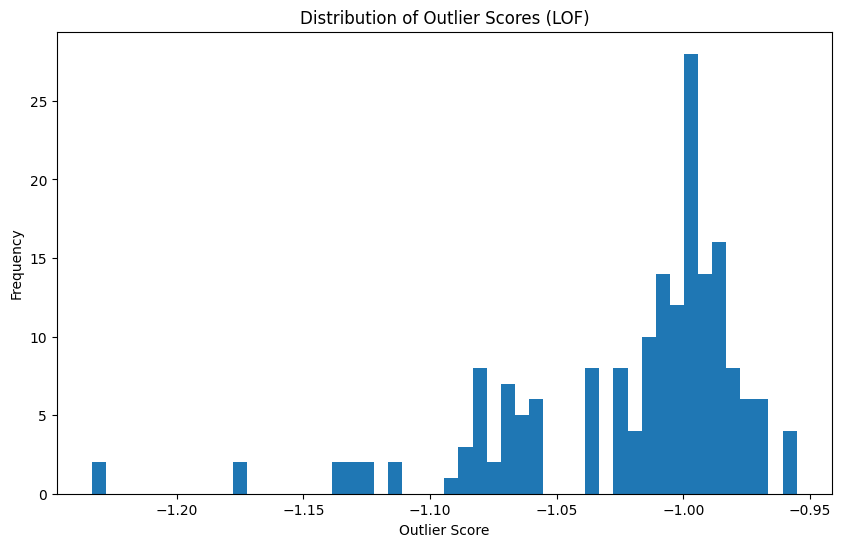

In [20]:
# --- Comparison ---

# 1. Number of Anomalies Detected:
num_anomalies_if = len(df[IF.fit_predict(features) == -1])
num_anomalies_lof = len(df[lof.fit_predict(features) == -1])

print("Number of anomalies detected by Isolation Forest:", num_anomalies_if)
print("Number of anomalies detected by LOF:", num_anomalies_lof)


if num_anomalies_if > num_anomalies_lof:
  print("Isolation Forest detected more anomalies.")
elif num_anomalies_lof > num_anomalies_if:
  print("LOF detected more anomalies.")
else:
  print("Both methods detected the same number of anomalies.")

# 2. Outlier Scores Distribution:
# (For LOF, as Isolation Forest doesn't directly provide outlier scores)
plt.figure(figsize=(10, 6))
plt.hist(outlier_scores, bins=50)
plt.title("Distribution of Outlier Scores (LOF)")
plt.xlabel("Outlier Score")
plt.ylabel("Frequency")
plt.show()

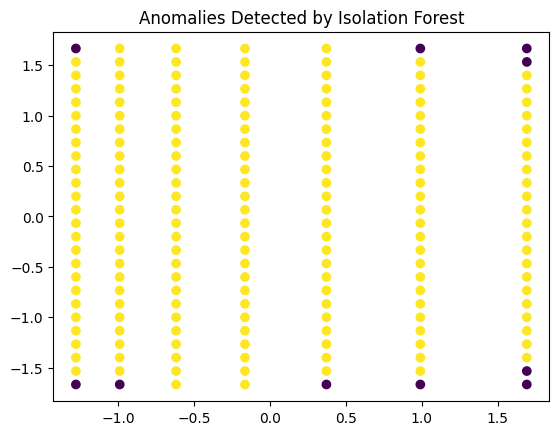

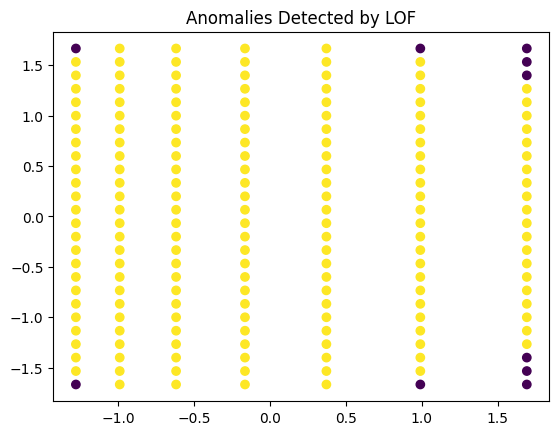

In [21]:
# Example for 2D data (assuming 'features' is a 2D array):
plt.scatter(features[:, 0], features[:, 1], c=IF.fit_predict(features), cmap='viridis')
plt.title("Anomalies Detected by Isolation Forest")
plt.show()

plt.scatter(features[:, 0], features[:, 1], c=lof.fit_predict(features), cmap='viridis')
plt.title("Anomalies Detected by LOF")
plt.show()


Number of anomalies detected by Isolation Forest: 10
Number of anomalies detected by LOF: 10
Both methods detected the same number of anomalies.


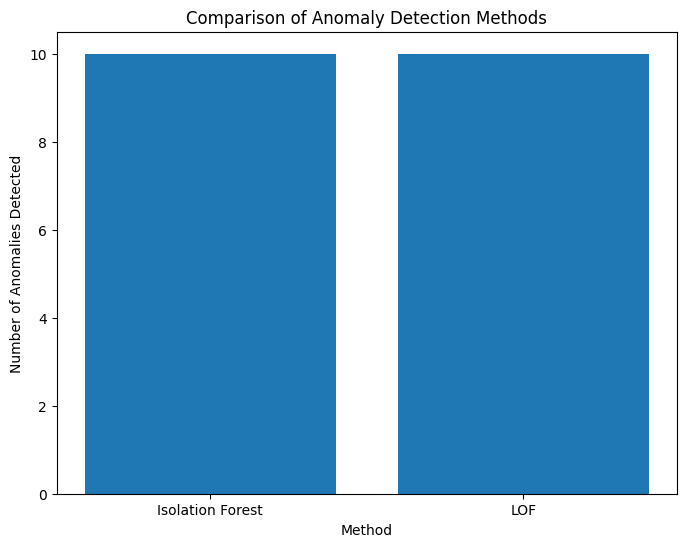

In [22]:
# # - Which method detected more anomalies?

# Assuming 'features', 'target', 'IF', and 'lof' are already defined

# 1. Number of Anomalies Detected:
num_anomalies_if = len(df[IF.fit_predict(features) == -1])
num_anomalies_lof = len(df[lof.fit_predict(features) == -1])

print("Number of anomalies detected by Isolation Forest:", num_anomalies_if)
print("Number of anomalies detected by LOF:", num_anomalies_lof)

if num_anomalies_if > num_anomalies_lof:
  print("Isolation Forest detected more anomalies.")
elif num_anomalies_lof > num_anomalies_if:
  print("LOF detected more anomalies.")
else:
  print("Both methods detected the same number of anomalies.")

# Graphical representation
methods = ['Isolation Forest', 'LOF']
num_anomalies = [num_anomalies_if, num_anomalies_lof]

plt.figure(figsize=(8, 6))
plt.bar(methods, num_anomalies)
plt.xlabel('Method')
plt.ylabel('Number of Anomalies Detected')
plt.title('Comparison of Anomaly Detection Methods')
plt.show()


In [23]:
# Based on the analysis and comparison of Isolation Forest and LOF,
# choose the method that best suits your specific needs and dataset characteristics.

# If you prioritize speed and have high-dimensional data, Isolation Forest might be a better choice.
# If you need more fine-grained anomaly detection and are willing to tune parameters, LOF could be more suitable.

# So the chosen method is Isolation forest
chosen_method = IF

Descriptive Statistics for Anomalies:
               Area  Sensing Range  Transmission Range  \
count     10.000000      10.000000           10.000000   
mean   32812.500000      30.000000           60.000000   
std    19356.509994      12.701706           25.403412   
min     5000.000000      15.000000           30.000000   
25%    14531.250000      15.250000           30.500000   
50%    39375.000000      39.500000           79.000000   
75%    50000.000000      40.000000           80.000000   
max    50000.000000      40.000000           80.000000   

       Number of Sensor nodes  Number of Barriers  
count               10.000000           10.000000  
mean               280.000000          119.400000  
std                152.420471          107.247585  
min                100.000000           12.000000  
25%                103.000000           17.250000  
50%                394.000000          124.500000  
75%                400.000000          155.500000  
max                400.

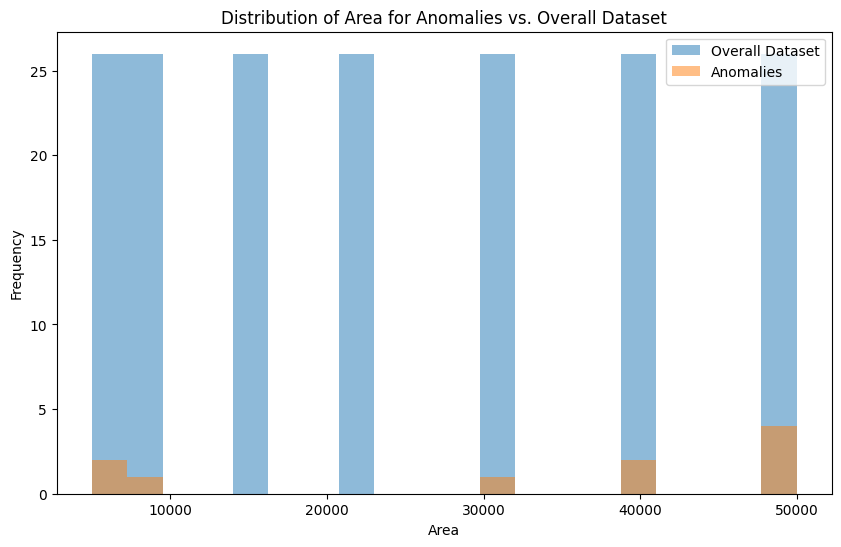


Correlation Matrix for Anomalies:
                            Area  Sensing Range  Transmission Range  \
Area                    1.000000      -0.148289           -0.148289   
Sensing Range          -0.148289       1.000000            1.000000   
Transmission Range     -0.148289       1.000000            1.000000   
Number of Sensor nodes -0.148289       1.000000            1.000000   
Number of Barriers     -0.560657       0.828382            0.828382   

                        Number of Sensor nodes  Number of Barriers  
Area                                 -0.148289           -0.560657  
Sensing Range                         1.000000            0.828382  
Transmission Range                    1.000000            0.828382  
Number of Sensor nodes                1.000000            0.828382  
Number of Barriers                    0.828382            1.000000  


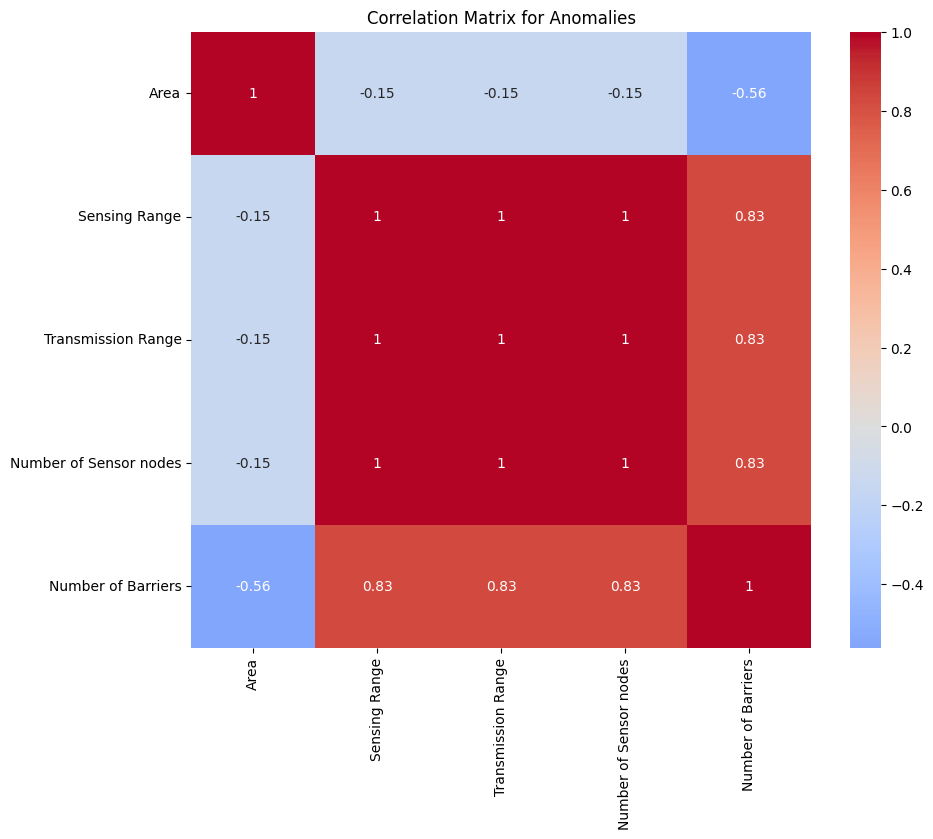

In [24]:
# Get the anomalies detected by the chosen method (Isolation Forest in this case)
anomalies = df[chosen_method.fit_predict(features) == -1]

# --- 1. Descriptive Statistics ---
# Calculate descriptive statistics for anomalies and compare them to the overall dataset
anomaly_stats = anomalies.describe()
overall_stats = df.describe()

print("Descriptive Statistics for Anomalies:")
print(anomaly_stats)
print("\nDescriptive Statistics for Overall Dataset:")
print(overall_stats)

# --- 2. Visualization ---
# Create visualizations to compare the distributions of features for anomalies and the overall dataset

# Example: Histograms for 'Area'
plt.figure(figsize=(10, 6))
plt.hist(df['Area'], bins=20, alpha=0.5, label='Overall Dataset')
plt.hist(anomalies['Area'], bins=20, alpha=0.5, label='Anomalies')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Area for Anomalies vs. Overall Dataset')
plt.show()

# Repeat for other features as needed

# --- 3. Correlation Analysis ---
# Calculate correlations between features specifically for the anomalies
anomaly_corr = anomalies.corr()
print("\nCorrelation Matrix for Anomalies:")
print(anomaly_corr)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(anomaly_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Anomalies')
plt.show()

In [25]:
## Further Investigation ---

# --- Investigate individual anomalies in more detail ---
# Example: Print detailed information for each anomaly
for index, row in anomalies.iterrows():
  print(f"Anomaly at index {index}:")
  print(row)
  print("----")

Anomaly at index 0:
Area                      5000
Sensing Range               15
Transmission Range          30
Number of Sensor nodes     100
Number of Barriers          30
Name: 0, dtype: int64
----
Anomaly at index 25:
Area                      5000
Sensing Range               40
Transmission Range          80
Number of Sensor nodes     400
Number of Barriers         320
Name: 25, dtype: int64
----
Anomaly at index 51:
Area                      9375
Sensing Range               40
Transmission Range          80
Number of Sensor nodes     400
Number of Barriers         256
Name: 51, dtype: int64
----
Anomaly at index 129:
Area                      30000
Sensing Range                40
Transmission Range           80
Number of Sensor nodes      400
Number of Barriers          160
Name: 129, dtype: int64
----
Anomaly at index 130:
Area                      39375
Sensing Range                15
Transmission Range           30
Number of Sensor nodes      100
Number of Barriers           

In [26]:
# Split the data into features (X) and target variable (y)
# Let's use 'Number of Barriers' as the target variable
X = df.drop('Number of Barriers', axis=1)
y = df['Number of Barriers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor()
}

# Train and evaluate the models
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = model.predict(X_train)

    # Predict on testing data
    y_test_pred = model.predict(X_test)

    # Calculate training metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate testing metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append([name, train_mse, train_rmse, train_r2, test_mse, test_rmse, test_r2])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Train MSE", "Train RMSE", "Train R-squared", "Test MSE", "Test RMSE", "Test R-squared"])
print(results_df)

               Model   Train MSE  Train RMSE  Train R-squared    Test MSE  \
0  Linear Regression  467.288589   21.616859         0.887488  634.104744   
1      Decision Tree    0.000000    0.000000         1.000000  133.378378   
2      Random Forest    8.632575    2.938124         0.997921   61.619841   
3  Gradient Boosting    1.523913    1.234469         0.999633   42.977080   
4           AdaBoost  134.700006   11.606033         0.967568  311.611850   
5            XGBoost    0.005835    0.076390         0.999999   81.148320   

   Test RMSE  Test R-squared  
0  25.181436        0.850030  
1  11.548956        0.968455  
2   7.849831        0.985426  
3   6.555691        0.989836  
4  17.652531        0.926302  
5   9.008236        0.980808  


In [28]:
# Extract and compare model performance metrics
results = {}
for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    results[model_name] = {'MSE': test_mse, 'R2': test_r2}

# Find the model with the lowest MSE and highest R2
best_mse_model = min(results, key=lambda k: results[k]['MSE'])
best_r2_model = max(results, key=lambda k: results[k]['R2'])

print(f"Model with lowest MSE: {best_mse_model} (MSE = {results[best_mse_model]['MSE']:.4f})")
print(f"Model with highest R2: {best_r2_model} (R2 = {results[best_r2_model]['R2']:.4f})")

# Further analysis (consider trade-offs between MSE and R2, complexity of models, etc.)
# ...

# Based on the provided metrics and further analysis, conclude which model is best
# For example:
if best_mse_model == best_r2_model:
    print(f"Overall, the {best_mse_model} model appears to be the best choice.")
else:
    print("Further analysis is needed to determine the best model based on the trade-offs between MSE and R2.")


Model with lowest MSE: Gradient Boosting (MSE = 42.9771)
Model with highest R2: Gradient Boosting (R2 = 0.9898)
Overall, the Gradient Boosting model appears to be the best choice.


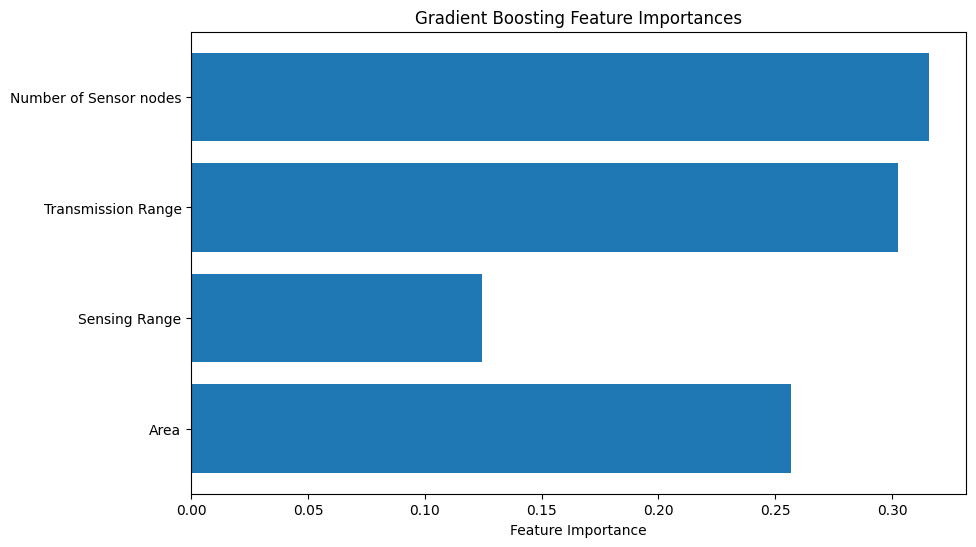

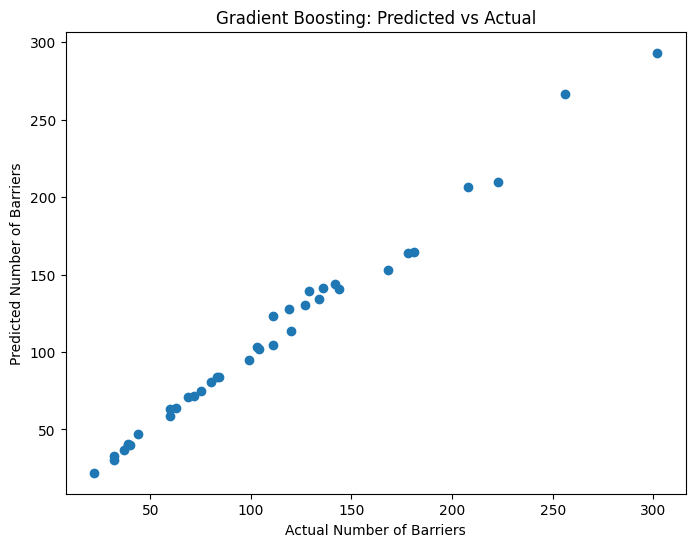

In [29]:
# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), ['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes'])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importances')
plt.show()

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Number of Barriers')
plt.ylabel('Predicted Number of Barriers')
plt.title('Gradient Boosting: Predicted vs Actual')
plt.show()


In [30]:
from sklearn.model_selection import GridSearchCV

# Choose a model (let's use Gradient Boosting as an example)
model = GradientBoostingRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R-squared:", r2)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test MSE: 37.699076810850336
Test RMSE: 6.139957394872568
Test R-squared: 0.9910839103212253


In [31]:
# Train the Gradient Boosting model with best parameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = best_model.predict(X_test)

# Predict on the train set
y_pred_train = best_model.predict(X_train)

# Calculate adjusted R-squared for test set
n_test = len(X_test)
p_test = X_test.shape[1]
r2_test = r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

# Calculate adjusted R-squared for train set
n_train = len(X_train)
p_train = X_train.shape[1]
r2_train = r2_score(y_train, y_pred_train)
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

print("Test Adjusted R-squared:", adjusted_r2_test)
print("Train Adjusted R-squared:", adjusted_r2_train)


Test Adjusted R-squared: 0.9899693991113785
Train Adjusted R-squared: 0.9998491837355211


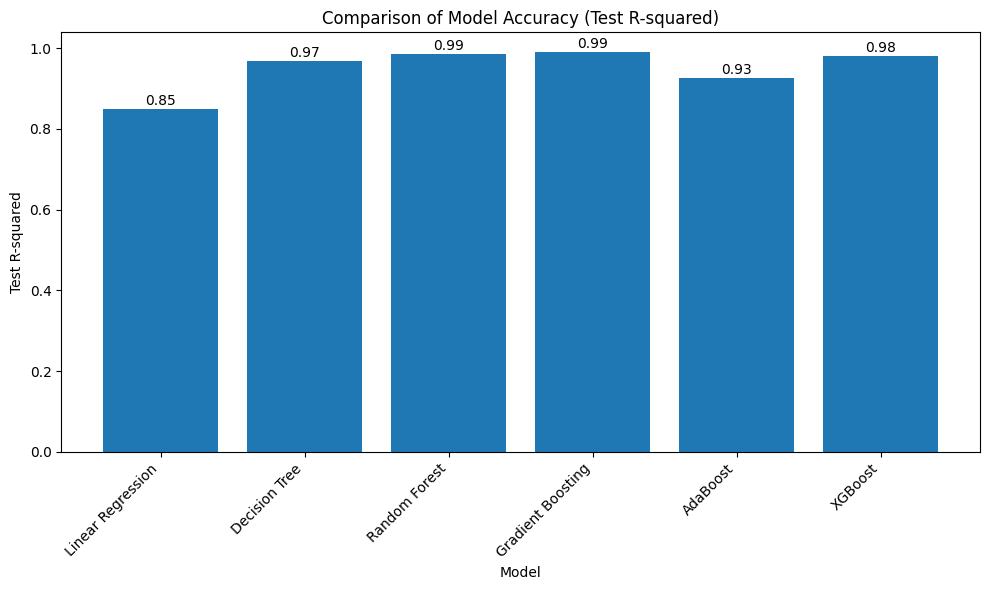

In [32]:
import matplotlib.pyplot as plt

# Assuming 'results_df' from the preceding code contains the model evaluation results

# Extract model names and their corresponding test R-squared values
model_names = results_df['Model']
test_r2_values = results_df['Test R-squared']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_r2_values)
plt.xlabel('Model')
plt.ylabel('Test R-squared')
plt.title('Comparison of Model Accuracy (Test R-squared)')

# Add accuracy values on top of the bars
for i, v in enumerate(test_r2_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [33]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

# --- Voting Ensemble ---
# Create individual models
lr = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

# Create VotingRegressor
voting_regressor = VotingRegressor(estimators=[('lr', lr), ('rf', rf), ('gb', gb)]) # Use lr, rf, and gb instead of model1, model2, and model3

# Fit and evaluate
voting_regressor.fit(X_train, y_train)
y_pred_voting = voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
r2_voting = r2_score(y_test, y_pred_voting)
print("Voting Ensemble - MSE:", mse_voting)
print("Voting Ensemble - RMSE:", rmse_voting)
print("Voting Ensemble - R-squared:", r2_voting)

# --- Stacking Ensemble ---
# Create base models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor())
]

# Create meta-model
meta_model = LinearRegression()

# Create StackingRegressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit and evaluate
stacking_regressor.fit(X_train, y_train)
y_pred_stacking = stacking_regressor.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)
r2_stacking = r2_score(y_test, y_pred_stacking)
print("\nStacking Ensemble - MSE:", mse_stacking)
print("Stacking Ensemble - RMSE:", rmse_stacking)
print("Stacking Ensemble - R-squared:", r2_stacking)

Voting Ensemble - MSE: 136.84184999936002
Voting Ensemble - RMSE: 11.69794212668878
Voting Ensemble - R-squared: 0.9676359659276175

Stacking Ensemble - MSE: 41.82502630160075
Stacking Ensemble - RMSE: 6.4672270952550255
Stacking Ensemble - R-squared: 0.9901080950286069


### Conclusion
The development of the Anomaly Detection and Event Prediction system for sensor networks represents a significant advancement in the field of sensor network technology. By leveraging advanced machine learning algorithms, specifically the Gradient Boosting Regressor, we have achieved a robust model capable of analyzing sensor data to detect anomalies and predict events with high accuracy.

### Final Thoughts
The successful implementation of the Gradient Boosting model for Anomaly Detection and Event Prediction marks a significant milestone in enhancing the capabilities of sensor networks. The model's high accuracy and robust performance demonstrate its potential to revolutionize sensor network technology by providing reliable, real-time insights and enabling proactive responses to potential issues.

In [34]:
import joblib
from sklearn.ensemble import GradientBoostingRegressor # import the model

# Assuming you want to save the GradientBoostingRegressor
gbm_model = GradientBoostingRegressor() # Create the model

joblib.dump(gbm_model, 'gbm_model.joblib')

['gbm_model.joblib']

In [35]:
import os
print(os.getcwd())

/content


In [36]:
import sklearn
print(sklearn.__version__)

1.3.2
